In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('./Datasets/madfhantr.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# Drop Load_ID
if 'Load_ID' in data.columns :
  data = data.drop('Load_ID', axis=1)

In [10]:
# In Dependents there is '3+' String, convert to 3 Numeric
if 'Dependents' in data.columns :
  data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)

In [14]:
# Fill NaN by cols mean
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
for col in numeric_cols:
  data[col] = data[col].fillna(data[col].mean())

In [15]:
# Convert Object to Numeric
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include = ['object'])
for col in categorical_cols : 
  data[col] = LabelEncoder().fit_transform(data[col])

In [16]:
# Split the dataset
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

In [31]:
# Train Test Split data and select model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [32]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report :\n",classification_report(y_test, y_pred))

Accuracy :  0.7560975609756098
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



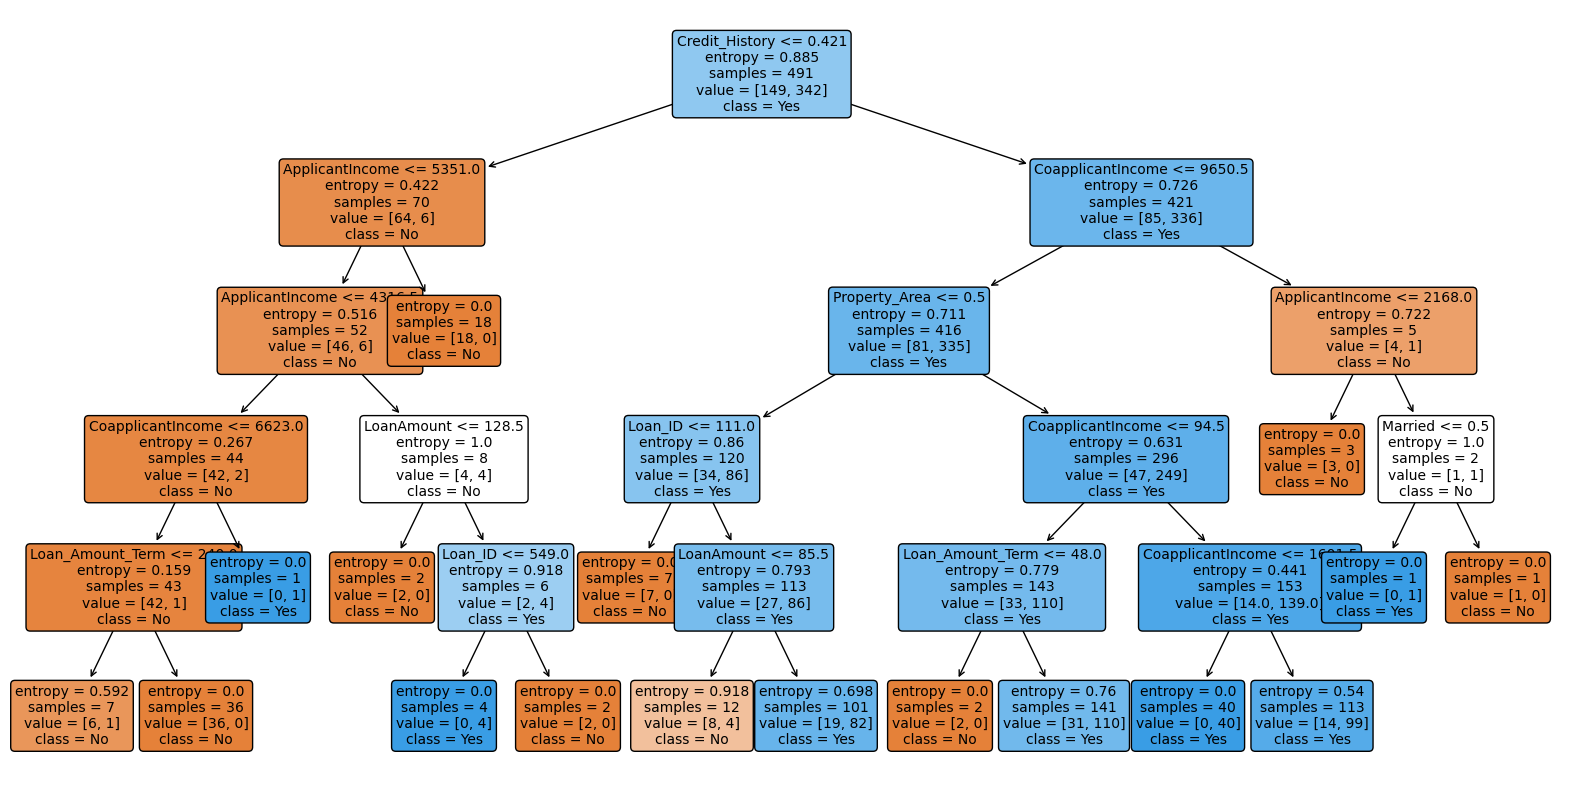

In [33]:
# Plot the tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.show()